# African Football Agents Dataset Generator

### Setup Required Libraries
Import necessary libraries including Faker, pandas, numpy, and random for generating synthetic data.

In [32]:
! pip install tqdm
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime
import uuid
import os
from tqdm.notebook import tqdm  # Changed to tqdm.notebook for Jupyter compatibility
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
fake = Faker()

# Number of records to generate
n_records = 500


## Configuration Data


In [33]:
AFRICAN_REGIONS = {
    'West Africa': [
        'Benin', 'Burkina Faso', 'Cape Verde', 'Ivory Coast', 'Gambia', 
        'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 
        'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'
    ],
    'North Africa': [
        'Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Western Sahara'
    ],
    'East Africa': [
        'Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 
        'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda', 'Seychelles', 
        'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Central Africa': [
        'Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Republic of the Congo', 
        'Democratic Republic of the Congo', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe'
    ],
    'Southern Africa': [
        'Botswana', 'Eswatini (Swaziland)', 'Lesotho', 'Namibia', 'South Africa'
    ]
}


COUNTRY_CODES = {
    'Algeria': '+213', 'Angola': '+244', 'Benin': '+229', 'Botswana': '+267', 'Burkina Faso': '+226',
    'Burundi': '+257', 'Cape Verde': '+238', 'Cameroon': '+237', 'Central African Republic': '+236',
    'Chad': '+235', 'Comoros': '+269', 'Democratic Republic of the Congo': '+243', 'Djibouti': '+253',
    'Egypt': '+20', 'Equatorial Guinea': '+240', 'Eritrea': '+291', 'Eswatini (Swaziland)': '+268',
    'Ethiopia': '+251', 'Gabon': '+241', 'Gambia': '+220', 'Ghana': '+233', 'Guinea': '+224',
    'Guinea-Bissau': '+245', 'Ivory Coast': '+225', 'Kenya': '+254', 'Lesotho': '+266', 'Liberia': '+231',
    'Libya': '+218', 'Madagascar': '+261', 'Malawi': '+265', 'Mali': '+223', 'Mauritania': '+222',
    'Mauritius': '+230', 'Morocco': '+212', 'Mozambique': '+258', 'Namibia': '+264', 'Niger': '+227',
    'Nigeria': '+234', 'Republic of the Congo': '+242', 'Rwanda': '+250', 'São Tomé and Príncipe': '+239',
    'Senegal': '+221', 'Seychelles': '+248', 'Sierra Leone': '+232', 'Somalia': '+252', 'South Africa': '+27',
    'South Sudan': '+211', 'Sudan': '+249', 'Tanzania': '+255', 'Togo': '+228', 'Tunisia': '+216',
    'Uganda': '+256', 'Zambia': '+260', 'Zimbabwe': '+263'
}


FAMOUS_PLAYERS = [
    # North Africa
    'Mohamed Salah', 'Achraf Hakimi', 'Riyad Mahrez', 'Youssef Msakni', 'Ali Maâloul',  
    'Seifeddine Jaziri', 'Wahbi Khazri', 'Aymen Balbouli', 'Anis Ben Slimane',

    # West Africa
    'Sadio Mané', 'Victor Osimhen', 'Kalidou Koulibaly', 'Thomas Partey', 'Wilfried Zaha',  
    'Samuel Chukwueze', 'Frank Kessié', 'Edmond Tapsoba', 'Inaki Williams',

    # Central Africa
    'Vincent Aboubakar', 'André Onana', 'Karl Toko Ekambi', 'Chancel Mbemba',

    # East Africa
    'Michael Olunga', 'Mbwana Samatta',

    # Southern Africa
    'Percy Tau', 'Patson Daka',

    # Goalkeepers
    'Édouard Mendy', 'Yassine Bounou', 'Aymen Dahmen'
]


CONTRACT_TERMS = [
    'Performance-based + Image Rights',
    'Long-term Development Focus',
    'High Base + Short Duration',
    'Balanced Terms with Bonuses',
    'Youth Development Oriented',
    'Experience-based Scaling',
    'Market Value Dependent',
    'Incentive-driven Performance',
    'Loyalty Bonus Included',
    'Buyout Clause Protection',
    'Renewal Option at Club’s Discretion',
    'Signing-on Fee Included',
    'Appearance-based Bonuses',
    'Relegation Release Clause',
    'Championship Clause Activation',
    'Sponsorship-linked Earnings',
    'Medical & Injury Coverage',
    'Revenue-sharing from Transfers',
    'No-trade Clause',
    'Endorsement Deal Integration'
]


## Data Generation Function

In [34]:
def generate_enhanced_agents():
    """Enhanced function to generate 500 realistic football agent profiles"""
    
    # Initialize data structure
    data = {
        'full_name': [], 'license_number': [], 'region': [], 'country': [],
        'top_clients': [], 'verified_status': [], 'total_clients': [],
        'success_rate': [], 'avg_contract_value': [], 'best_negotiated_contract': [],
        'preferred_contract_terms': [], 'contact_email': [], 'phone_number': [],
        'profile_rating': [], 'years_experience': [], 'languages_spoken': [],
        'specialization': [], 'last_contract_date': [], 'agency_affiliation': []
    }
    
    # Define additional constraints and ranges
    MIN_CONTRACT_VALUE = 50000
    MAX_CONTRACT_VALUE = 15000000
    MIN_SUCCESS_RATE = 60
    MAX_SUCCESS_RATE = 98
    MIN_CLIENTS = 5
    MAX_CLIENTS = 100
    
    print(f"Generating {n_records} agent profiles...")
    
    for _ in range(n_records):  # Removed tqdm for simplicity
        # Region and location data
        region = random.choice(list(AFRICAN_REGIONS.keys()))
        country = random.choice(AFRICAN_REGIONS[region])
        
        # Basic agent information
        name = f"{fake.first_name()} {fake.last_name()}"
        years_exp = random.randint(1, 30)
        
        # Professional skills and specializations
        languages = random.sample(
            ['English', 'French', 'Arabic', 'Portuguese', 'Swahili', 'Spanish'], 
            k=random.randint(2, 4)
        )
        specializations = random.sample(
            ['Youth Development', 'International Transfers', 
             'Contract Negotiation', 'Player Marketing',
             'Talent Scouting', 'Career Development'],
            k=random.randint(2, 3)
        )
        
        # Performance metrics
        success_rate = round(random.uniform(MIN_SUCCESS_RATE, MAX_SUCCESS_RATE), 2)
        avg_contract = round(random.uniform(MIN_CONTRACT_VALUE, MAX_CONTRACT_VALUE), 2)
        total_clients = random.randint(MIN_CLIENTS, MAX_CLIENTS)
        
        # Populate data dictionary
        data['full_name'].append(name)
        data['license_number'].append(f"FA{str(uuid.uuid4())[:8].upper()}")
        data['region'].append(region)
        data['country'].append(country)
        data['top_clients'].append(', '.join(random.sample(FAMOUS_PLAYERS, k=random.randint(2, 4))))
        data['verified_status'].append(random.choice([True, False]))
        data['total_clients'].append(total_clients)
        data['success_rate'].append(success_rate)
        data['avg_contract_value'].append(avg_contract)
        data['best_negotiated_contract'].append(
            f"€{round(random.uniform(avg_contract, MAX_CONTRACT_VALUE*1.5), 2):,.2f} - "
            f"{random.choice(FAMOUS_PLAYERS)}"
        )
        data['preferred_contract_terms'].append(random.choice(CONTRACT_TERMS))
        data['contact_email'].append(f"{name.lower().replace(' ', '.')}@{fake.domain_name()}")
        data['phone_number'].append(f"{COUNTRY_CODES.get(country, '+000')}"
                                  f"{fake.msisdn()[4:]}")
        data['profile_rating'].append(round(random.uniform(3.5, 5.0), 2))
        data['years_experience'].append(years_exp)
        data['languages_spoken'].append(', '.join(languages))
        data['specialization'].append(', '.join(specializations))
        data['last_contract_date'].append(
            fake.date_between(start_date='-1y', end_date='today')
        )
        data['agency_affiliation'].append(fake.company())
    
    print(f"Successfully generated {n_records} agent profiles!")
    return pd.DataFrame(data)


## Generate Dataset and Save

In [35]:
# Generate enhanced dataset
df = generate_enhanced_agents()

# Save dataset
output_path = r"C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\PlayersAgents dataset\player_agent.csv"

try:
    df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"Dataset successfully saved to:\n{output_path}")
except Exception as e:
    print(f"Error saving file: {str(e)}")

Generating 500 agent profiles...
Successfully generated 500 agent profiles!
Dataset successfully saved to:
C:\Users\MSI\OneDrive - ESPRIT\Bureau\4DS ESPRIT\SEM2\PI PROJECT\Scrap Datasets\PlayersAgents dataset\player_agent.csv


## Data Analysis and Visualization


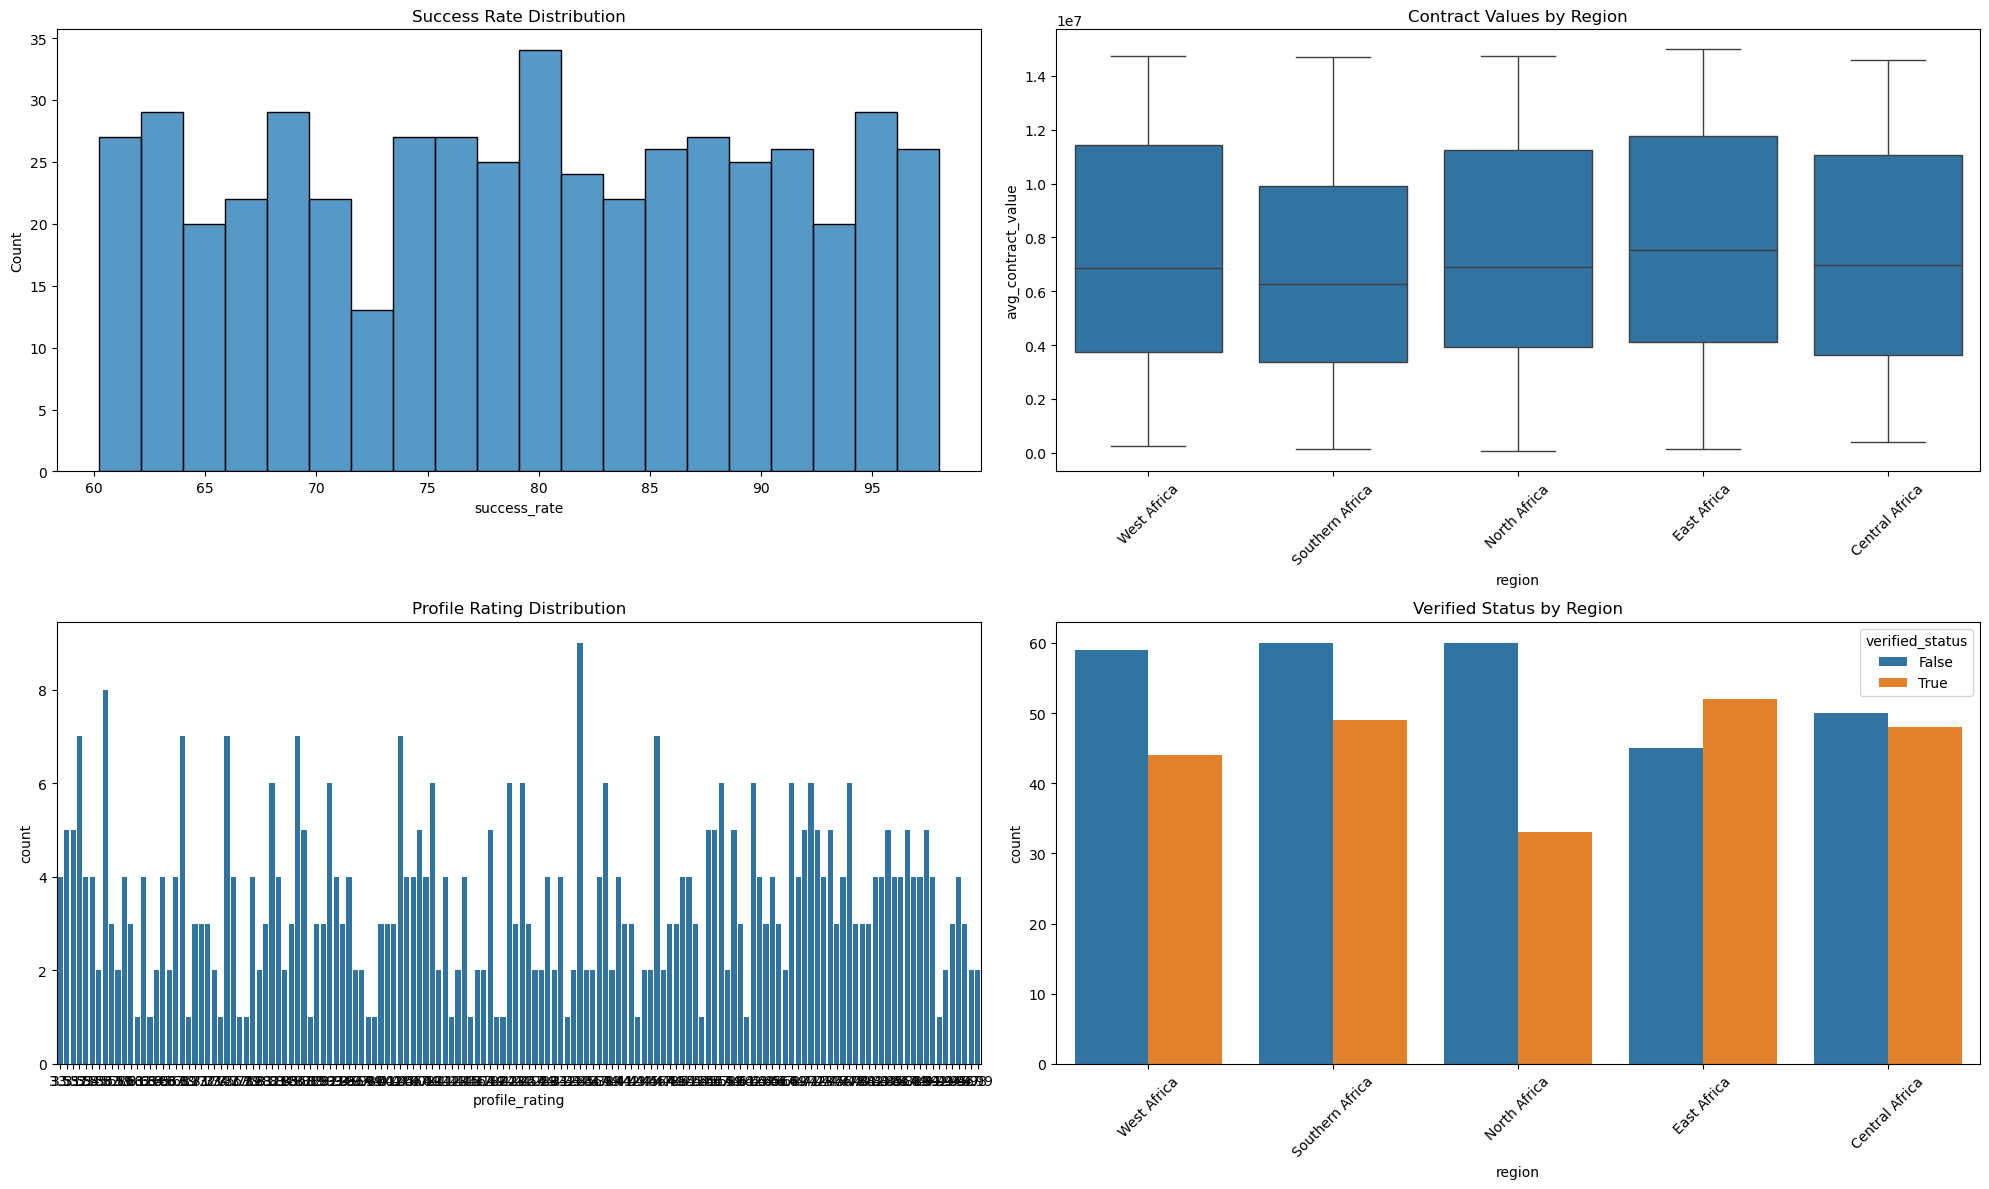


Dataset Summary Statistics:
Total Agents: 500
Verified Agents: 226
Average Success Rate: 79.33%
Average Contract Value: €7,238,688.84


In [36]:
# Create visualizations
plt.style.use('default')
fig = plt.figure(figsize=(20, 12))

# Success Rate Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='success_rate', bins=20)
plt.title('Success Rate Distribution')

# Average Contract Value by Region
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='region', y='avg_contract_value')
plt.xticks(rotation=45)
plt.title('Contract Values by Region')

# Profile Ratings
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='profile_rating')
plt.title('Profile Rating Distribution')

# Verified Status by Region
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='region', hue='verified_status')
plt.xticks(rotation=45)
plt.title('Verified Status by Region')

plt.tight_layout()
plt.show()
# Display summary statistics
print("\nDataset Summary Statistics:")
print(f"Total Agents: {len(df)}")
print(f"Verified Agents: {df['verified_status'].sum()}")
print(f"Average Success Rate: {df['success_rate'].mean():.2f}%")
print(f"Average Contract Value: €{df['avg_contract_value'].mean():,.2f}")